In [1]:
!which python

/home/ebeyerle/anaconda3/envs/hoomd/bin/python


In [2]:
#!/usr/bin/env python
# coding: utf-8


import numpy as np
import freud
import matplotlib.pyplot as plt
import subprocess
from scipy import spatial
import os
import sys
from tqdm import tqdm
print(os.getcwd())

/media/ebeyerle/seagate/frenkel/ellipsoid/GB/nvt/GB_3_5_2_1/anneal/notebooks


In [3]:
import tqdm
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
#import torch
from numpy.random import rand
#from torch_geometric.data import Data
import pyscal.core as pc # pyScal core
import pyscal.traj_process as ptp # pyScal trajectory processor
#import mdtraj as md

In [4]:
def quat2rot(quat):
	w = quat[:,0]
	x = quat[:,1]
	y = quat[:,2]
	z = quat[:,3]
	rot = np.array([
		[1 - 2 * y**2 - 2 * z**2, 2 * x * y + 2 * w * z, 2 * x * z - 2 * w * y],
		[2 * x * y - 2 * w * z, 1 - 2 * x**2 - 2 * z**2, 2 * y * z + 2 * w * x],
		[ 2 * x * z + 2 * w * y, 2 * y * z - 2 * w * x, 1 - 2 * x**2 - 2 * y**2]
	])
	return rot

def nop(quats, n):
	dp = np.dot(n, np.matmul(n, quat2rot(quats)))
	S = 0.5 * ((3 * dp * dp) - 1).mean()
	return S

def calc_Q(quats, d = np.array([1, 0, 0])):
	from scipy import spatial
	Q_list = []
	d_list = []
	S_list = []
	for k, quat in enumerate(quats):
		u = np.matmul(spatial.transform.Rotation.from_quat(quat).as_matrix(), d)
		Q = np.zeros((3, 3))
		for i in range(u.shape[0]):
			Q += (1.5 * np.outer(u[i,:], u[i,:])) - 0.5 * np.eye(3)
		_, tmp = np.linalg.eigh(Q / u.shape[0])
		d = tmp[:,-1]
		Q_list.append(Q)
		d_list.append(d)
		S_list.append(_[-1])
	Q_list = np.array(Q_list)
	d_list = np.array(d_list)
	S_list = np.array(S_list)
	return Q_list, d_list, S_list

def rot_from_quat(q, r):
	q_s = q[:,0]
	q_v = q[:,1:].ravel()
	
	r_rotated = (q_s * q_s - np.dot(q_v, q_v)) * r + 2 * q_s * (np.cross(q_v, r)) + 2 * (np.dot(q_v, r)) * q_v
	return r_rotated

In [40]:
boxl = -1.1233261982052916e+01 + 2.1257859853235995e+01


directories = []
directories.append('../T_0.1_rho_0.35')

u_hat_avg = np.zeros((NN_list.shape[0], NN_list.shape[1], 3))
timestep = 0.15
for counter, d in enumerate(directories):
    print(d)
    directory = d

    NFRS = ftraj.shape[0]
    N = ftraj.shape[1]

    
    x = np.array([1, 0, 0])
    d = x

    for k, quat in enumerate(fquats):
        if k % 100 == 0: print(k)
        for i in range(u_hat_avg.shape[1]):
            u = np.mean(np.matmul(spatial.transform.Rotation.from_quat(np.roll(quat, -1, axis = 1)).as_matrix(), d)[NN_list[k,i]],
                        axis = 0)
            U_avg[k,i,:] = np.dot(u,       

../T_0.1_rho_0.35
0
100
200
300
400
500
600
700
800
900
1000


In [10]:
boxl = -1.1233261982052916e+01 + 2.1257859853235995e+01

T_list = [0.2, 0.5, 1.0, 1.2, 1.5, 1.7, 1.8, 1.9, 2.0, 2.2, 2.4]

directories = []
directories.append('../T_0.2_rho_0.35')
#directories.append('../T_0.2_rho_0.35')
directories.append('../T_0.5_rho_0.35')
#directories.append('../T_0.7_rho_0.35')
#directories.append('../T_0.9_rho_0.35')
directories.append('../T_1.0_rho_0.35')
directories.append('../T_1.2_rho_0.35')
directories.append('../T_1.5_rho_0.35')
directories.append('../T_1.7_rho_0.35')
directories.append('../T_1.8_rho_0.35')
directories.append('../T_1.9_rho_0.35')
directories.append('../T_2.0_rho_0.35')
directories.append('../T_2.2_rho_0.35')
directories.append('../T_2.4_rho_0.35')
timestep = 0.15
for counter, d in enumerate(directories):
    print(d)
    directory = d

    if counter <= 3:
        ftraj = np.load('%s/sparse_processed_traj.npy' % (d))[:10000]
        fquats = np.load('%s/sparse_processed_quats.npy' % (d))[:10000]
        print(ftraj.shape)
    else:
        ftraj = np.load('%s/processed_traj.npy' % (d))[:10000]
        fquats = np.load('%s/processed_quats.npy' % (d))[:10000]
        print(ftraj.shape)
    #nrg = np.load('%s/e.npy' % d)[:10000]
    S_proxy = np.zeros(ftraj.shape[0])
    S = np.zeros(ftraj.shape[0])
    orientations = np.zeros_like(ftraj)


    NFRS = ftraj.shape[0]
    N = ftraj.shape[1]

    # get location of particle CoM
    #director_list = []

    x = np.array([1, 0, 0])


    for k, quat in enumerate(fquats):
        if k % 100 == 0: print(k)
        d = x
        u = np.matmul(spatial.transform.Rotation.from_quat(np.roll(quat, -1, axis = 1)).as_matrix(), d)
        eigvals, _ = np.linalg.eigh((np.matmul(u.T, u) / 343 - (1 / 3) * np.eye(3)))
        S_proxy[k] = 1.5 * eigvals.max()
        
        x_nematic = freud.order.Nematic(d)
        x_nematic.compute(fquats[k])
        S[k] = x_nematic.order
        orientations[k] = u
    np.save('%sT/orientations.npy' % T_list[counter], orientations)
    np.save('%sT/S.npy' % T_list[counter], S_proxy)
    np.save('%sT/e.npy' % T_list[counter], nrg)

../T_0.2_rho_0.35
(10000, 343, 3)
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
../T_0.5_rho_0.35
(10000, 343, 3)
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9

In [37]:
        d = x
        u = np.matmul(spatial.transform.Rotation.from_quat(quat).as_matrix(), d)
        #S_proxy[k] = np.mean(np.outer(u, u.T))
        
        x_nematic = freud.order.Nematic(d)
        x_nematic.compute(fquats[k])
        S[k] = x_nematic.order

In [115]:
local_S = np.load('../T_0.1_rho_0.35/local_S.npy')[::10]

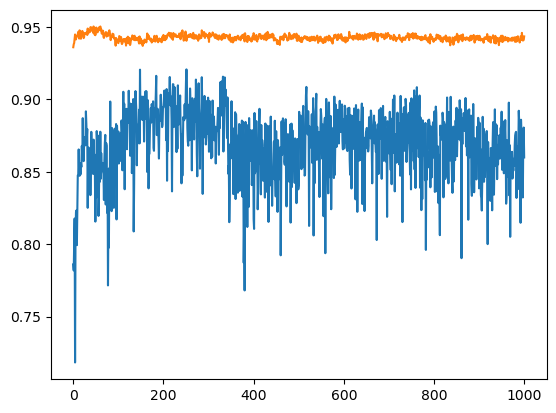

In [127]:
plt.plot(S_proxy.mean(1))
plt.plot(local_S.mean(1))

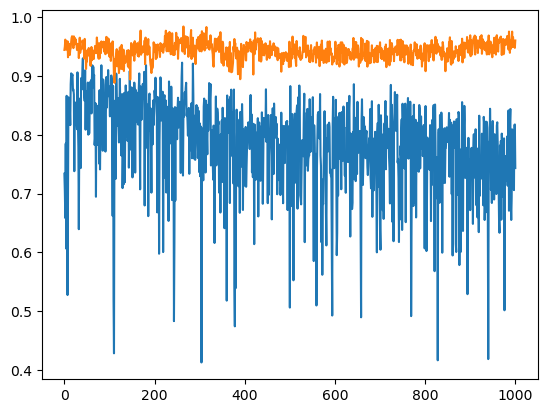

In [116]:
plt.plot(S_proxy[:,0])
plt.plot(local_S[:,0])

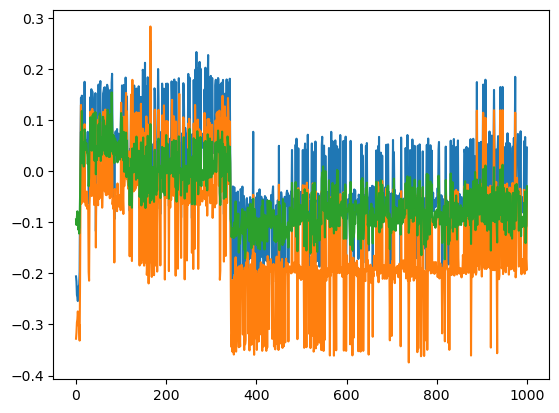

In [47]:
plt.plot(u_hat_avg[:,0,:])

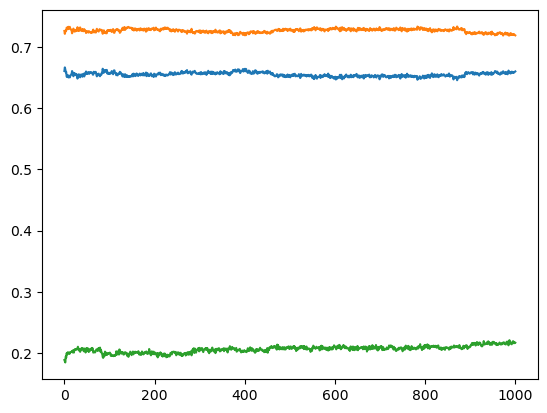

In [46]:
plt.plot(director_list)

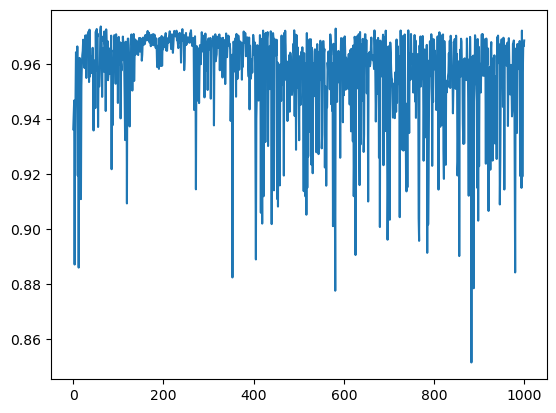

In [56]:
plt.plot(abs(U).mean(2)[:,10])

In [139]:
z = np.load('T_1.77_z.npy')
local_predictions = np.load('T_1.77_local_predictions.npy')
global_predictions = np.load('T_1.77_global_predictions.npy')[:,0,:]

In [155]:
np.unique(local_predictions.argmax(2))

array([0, 2])

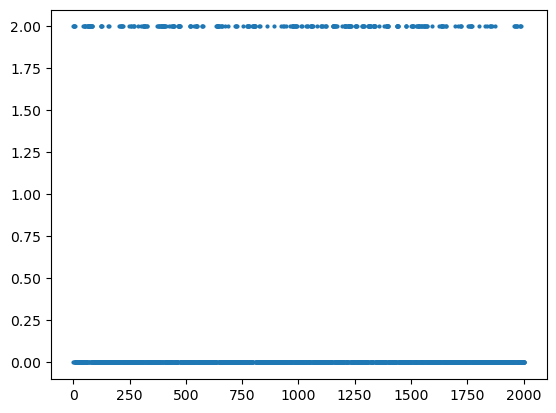

In [147]:
plt.plot(global_predictions.argmax(1), lw = 0, marker = 'o', markersize = 2)

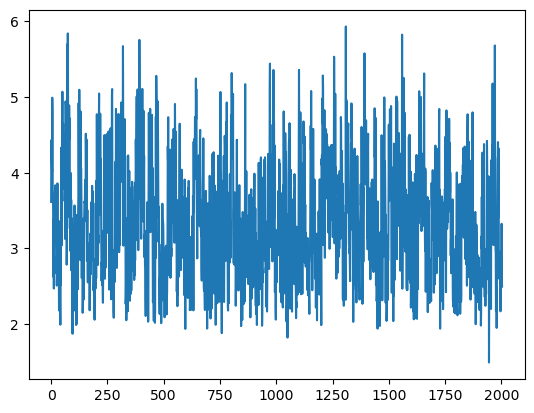

In [131]:
plt.plot(z[:,0])

(array([ 33., 212., 448., 545., 420., 219.,  91.,  27.,   5.,   4.]),
 array([2.40850854, 2.65301991, 2.89753151, 3.14204311, 3.38655448,
        3.63106585, 3.87557745, 4.12008905, 4.36460018, 4.60911179,
        4.85362339]),
 <BarContainer object of 10 artists>)

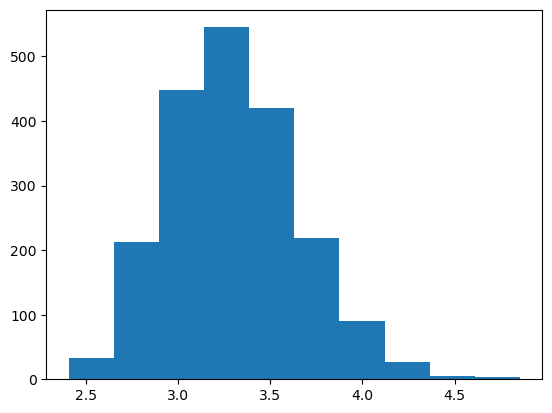

In [133]:
plt.hist(z[:,1])

In [16]:
boxl = -1.1233261982052916e+01 + 2.1257859853235995e+01

T_list = [0.2, 0.5, 1.0, 1.2, 1.5, 1.7, 1.8, 1.9, 2.0, 2.2, 2.4]

directories = []
directories.append('../T_0.2_rho_0.35')
#directories.append('../T_0.2_rho_0.35')
directories.append('../T_0.5_rho_0.35')
#directories.append('../T_0.7_rho_0.35')
#directories.append('../T_0.9_rho_0.35')
directories.append('../T_1.0_rho_0.35')
directories.append('../T_1.2_rho_0.35')
directories.append('../T_1.5_rho_0.35')
directories.append('../T_1.7_rho_0.35')
directories.append('../T_1.8_rho_0.35')
directories.append('../T_1.9_rho_0.35')
directories.append('../T_2.0_rho_0.35')
directories.append('../T_2.2_rho_0.35')
directories.append('../T_2.4_rho_0.35')
timestep = 0.15
for counter, d in enumerate(directories):
    print(d)
    directory = d

    if counter <= 3:
        ftraj = np.load('%s/sparse_processed_traj.npy' % (d))[:10000]
        fquats = np.load('%s/sparse_processed_quats.npy' % (d))[:10000]
        print(ftraj.shape)
    else:
        ftraj = np.load('%s/processed_traj.npy' % (d))[:10000]
        fquats = np.load('%s/processed_quats.npy' % (d))[:10000]
        print(ftraj.shape)
    #nrg = np.load('%s/e.npy' % d)[:10000]
    S_proxy = np.zeros(ftraj.shape[0])
    S = np.zeros(ftraj.shape[0])
    orientations = np.zeros_like(ftraj)


    NFRS = ftraj.shape[0]
    N = ftraj.shape[1]

    # get location of particle CoM
    #director_list = []

    x = np.array([1, 0, 0])


    for k, quat in enumerate(fquats):
        if k % 100 == 0: print(k)
        d = x
        u = np.matmul(spatial.transform.Rotation.from_quat(np.roll(quat, -1, axis = 1)).as_matrix(), d)
        eigvals, _ = np.linalg.eigh((np.matmul(u.T, u) / 343 - (1 / 3) * np.eye(3)))
        S_proxy[k] = 1.5 * eigvals.max()
        
        x_nematic = freud.order.Nematic(d)
        x_nematic.compute(fquats[k])
        S[k] = x_nematic.order
        orientations[k] = u
    cosines = np.matmul(orientations, x_nematic.director)
    np.save('%sT/cosines.npy' % T_list[counter], cosines)
    #np.save('%sT/S.npy' % T_list[counter], S_proxy)
    #np.save('%sT/e.npy' % T_list[counter], nrg)

../T_0.2_rho_0.35
(10000, 343, 3)
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
../T_0.5_rho_0.35
(10000, 343, 3)
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9

In [40]:
boxl = -1.1233261982052916e+01 + 2.1257859853235995e+01

T_list = [0.2, 0.5, 1.0, 1.2, 1.5, 1.7, 1.8, 1.9, 2.0, 2.2, 2.4]

var_list = []
for counter, d in enumerate(directories):
    print(d)
    directory = d

    cosines = np.load('%sT/cosines.npy' % T_list[counter])**2
    var_list.append((cosines**2).mean(0) - (cosines.mean(0))**2)
    #np.save('%sT/S.npy' % T_list[counter], S_proxy)
    #np.save('%sT/e.npy' % T_list[counter], nrg)

../T_0.2_rho_0.35
../T_0.5_rho_0.35
../T_1.0_rho_0.35
../T_1.2_rho_0.35
../T_1.5_rho_0.35
../T_1.7_rho_0.35
../T_1.8_rho_0.35
../T_1.9_rho_0.35
../T_2.0_rho_0.35
../T_2.2_rho_0.35
../T_2.4_rho_0.35


In [41]:
cosines.shape

(10000, 343)

In [42]:
var_list = np.array(var_list)

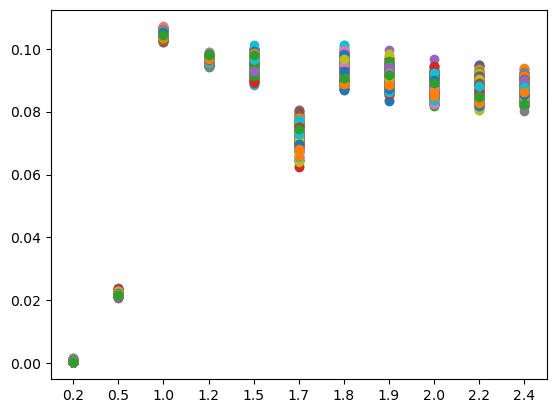

In [43]:
plt.plot(var_list, marker = 'o', lw = 0)
plt.xticks(np.arange(var_list.shape[0]), T_list)
plt.show()
plt.close()